# 영상 데이터 예측 by 전이학습 template

# 데이터 준비

In [ ]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/cat_face_keypoint.zip

--2021-12-27 04:02:35--  https://github.com/dhrim/deep_learning_data/raw/master/cat_face_keypoint.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/cat_face_keypoint.zip [following]
--2021-12-27 04:02:35--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/cat_face_keypoint.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81178786 (77M) [application/zip]
Saving to: ‘cat_face_keypoint.zip’

cat_face_keypoint.z 100%[===================>]  77.42M   253MB/s    in 0.3s    

2021-12-27 04:02:36 (253 MB/s) - ‘cat_face_keypoint.zip’ saved [8117878

In [ ]:
!unzip cat_face_keypoint.zip

Archive:  cat_face_keypoint.zip
  inflating: cat_image_and_keypoint.npy  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.kaggle.com/crawford/cat-dataset 의
고양이 영상 파일과 레이블링 데이터를 읽고 numpy 파일로 저장해 두었다. <br>


In [ ]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
x = np.array(dic_data.get('imgs'))
y = np.array(dic_data.get('lmks'))

In [ ]:
print(x.shape)
print(y.shape)

(300, 224, 224, 3)
(300, 18)


## 이미지 보기

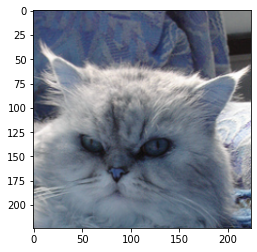

[ 59 135 128 137  85 177  32  93  19  48  50  64 172  72 205  67 188 106]


In [ ]:
plt.imshow(x[0])
plt.show()
print(y[0])

## 키 포인트 보기

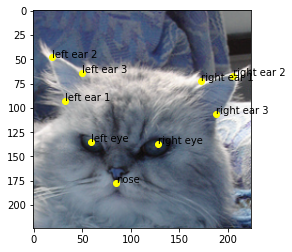

In [ ]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)

plt.scatter(target_y[0], target_y[1], color='yellow')
plt.text(target_y[0], target_y[1], 'left eye')
plt.scatter(target_y[2], target_y[3], color='yellow')
plt.text(target_y[2], target_y[3], 'right eye')
plt.scatter(target_y[4], target_y[5], color='yellow')
plt.text(target_y[4], target_y[5], 'nose')
plt.scatter(target_y[6], target_y[7], color='yellow')
plt.text(target_y[6], target_y[7], 'left ear 1')
plt.scatter(target_y[8], target_y[9], color='yellow')
plt.text(target_y[8], target_y[9], 'left ear 2')
plt.scatter(target_y[10], target_y[11], color='yellow')
plt.text(target_y[10], target_y[11], 'left ear 3')
plt.scatter(target_y[12], target_y[13], color='yellow')
plt.text(target_y[12], target_y[13], 'right ear 1')
plt.scatter(target_y[14], target_y[15], color='yellow')
plt.text(target_y[14], target_y[15], 'right ear 2')
plt.scatter(target_y[16], target_y[17], color='yellow')
plt.text(target_y[16], target_y[17], 'right ear 3')

plt.show()

## 코만 추리기

코에 해당하는 인덱스 4,5만 추림

In [ ]:
y = y[:,4:6]

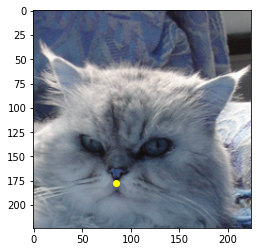

In [ ]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.show()

## normalization

In [ ]:
x = x / 255.

## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(240, 224, 224, 3)
(240, 2)
(60, 224, 224, 3)
(60, 2)


In [ ]:
print(train_y[:10])

[[128 200]
 [124 185]
 [ 18 183]
 [ 88 203]
 [110 196]
 [172 205]
 [ 93 203]
 [139 201]
 [ 86 191]
 [121 205]]


# Template

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                           

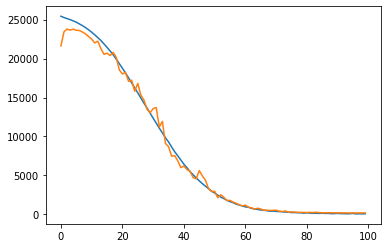

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2))

model.summary()

model.compile(optimizer='Adam', loss='mse')   # 예측 문제라서 loss='mse'


history = model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


# 결과 보기

In [ ]:
predicted = model.predict(test_x[:16])

In [ ]:
print(predicted.shape)
print(predicted)

(16, 2)
[[139.87727  194.72191 ]
 [117.21788  197.03313 ]
 [120.0184   192.08104 ]
 [ 71.12157  196.10301 ]
 [119.33162  177.76315 ]
 [ 80.12715  191.97801 ]
 [105.879715 174.55946 ]
 [ 49.97533  177.22523 ]
 [113.58506  196.84898 ]
 [ 60.48503  180.29518 ]
 [127.0298   196.12164 ]
 [ 98.53992  189.53877 ]
 [139.13815  201.50838 ]
 [118.98996  193.50226 ]
 [125.31494  194.40813 ]
 [108.97612  192.6178  ]]


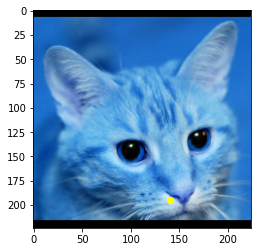

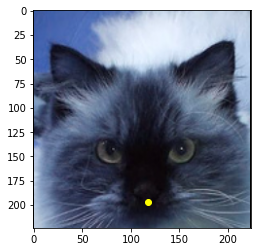

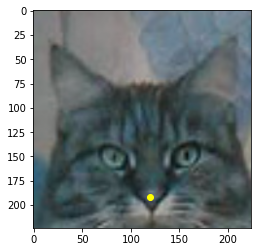

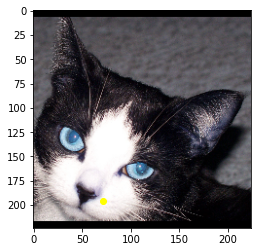

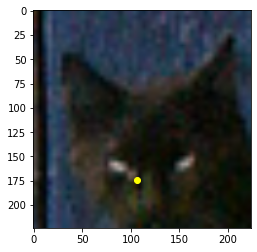

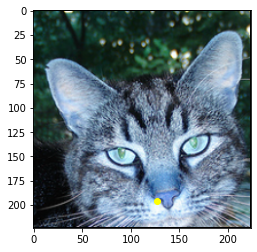

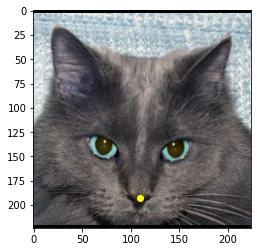

In [ ]:
for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(predicted[i][0], predicted[i][1], color='yellow')
  plt.show()

# 오른쪽 눈 위치 예측하기

## 데이터 준비

In [ ]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
raw_x = np.array(dic_data.get('imgs'))
raw_y = np.array(dic_data.get('lmks'))

## 오른쪽 눈만 추리기

In [ ]:
x = raw_x
y = raw_y[:,2:4]

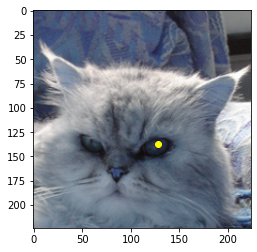

In [ ]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.show()

## Normalization

In [ ]:
x = x / 255.

## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(240, 224, 224, 3)
(240, 2)
(60, 224, 224, 3)
(60, 2)


In [ ]:
# 제대로 y값이 있는지 눈으로 확인해 보기위헤 프린트 해보기
print(train_y[:10])

[[128 138]
 [171 149]
 [148 148]
 [113 176]
 [150 137]
 [144 142]
 [104 132]
 [119 155]
 [142 138]
 [162 142]]


## Template

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8028288   
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 10,287,042
Trainable params: 8,028,802
N

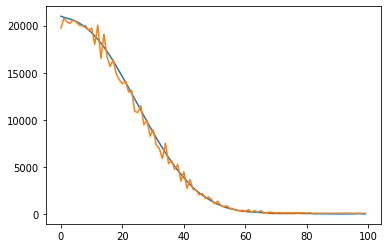

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2))

model.summary()

model.compile(optimizer='Adam', loss='mse')


history = model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


## 결과 보기

In [ ]:
predicted = model.predict(test_x[:16])

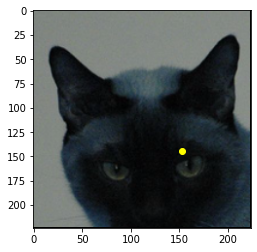

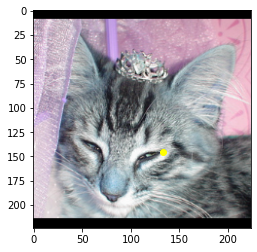

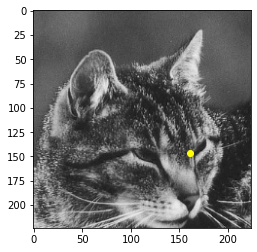

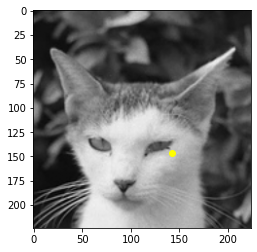

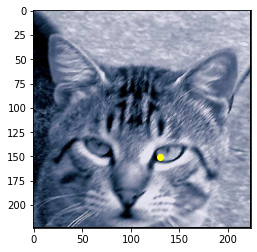

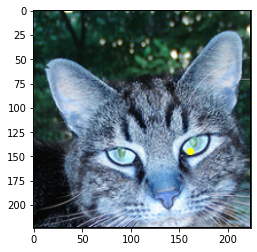

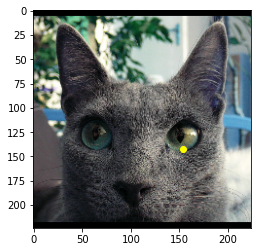

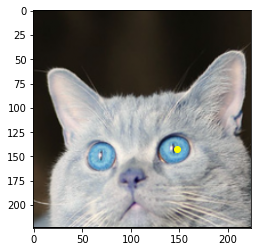

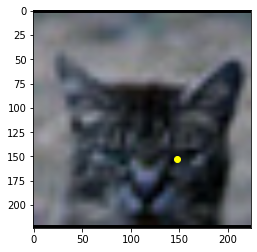

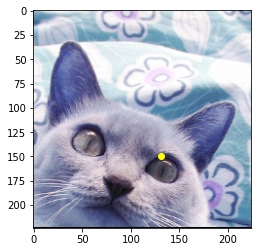

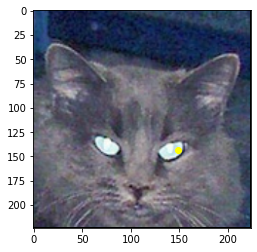

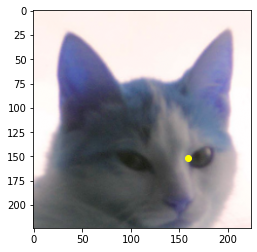

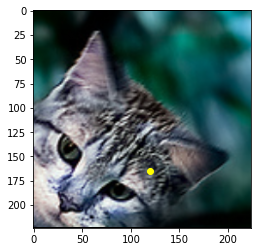

In [ ]:
for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(predicted[i][0]*255, int(predicted[i][1]*255), color='yellow')
  plt.show()

# 오른쪽 눈 위치 예측하기 - y값 Normalization

## 데이터 준비

In [ ]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
raw_x = np.array(dic_data.get('imgs'))
raw_y = np.array(dic_data.get('lmks'))

## 오른쪽 눈만 추리기

In [ ]:
x = raw_x
y = raw_y[:,2:4]

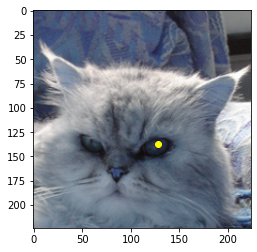

In [ ]:
target_x = raw_x[0]
target_y = y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.show()

## Normalization

In [ ]:
x = x / 255.

In [ ]:
y = y / 255.

## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(240, 224, 224, 3)
(240, 2)
(60, 224, 224, 3)
(60, 2)


In [ ]:
# 제대로 y값이 있는지 눈으로 확인해 보기위헤 프린트 해보기
print(train_y[:10])

[[0.54901961 0.59215686]
 [0.46666667 0.60784314]
 [0.74117647 0.50980392]
 [0.54117647 0.56470588]
 [0.51372549 0.59215686]
 [0.59607843 0.56078431]
 [0.63137255 0.56862745]
 [0.59215686 0.49803922]
 [0.61176471 0.50980392]
 [0.45490196 0.62352941]]


## Template

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               8028288   
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                                 
Total params: 10,287,042
Trainable params: 8,028,802
N

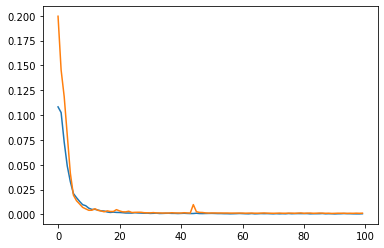

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

right_eye_model = models.Sequential()

right_eye_model.add(conv_layers)
right_eye_model.add(Flatten())
right_eye_model.add(Dense(128, activation='relu'))
right_eye_model.add(BatchNormalization())
right_eye_model.add(Dense(2, activation="sigmoid"))  # <-------------- activation="sigmoid"

right_eye_model.summary()

right_eye_model.compile(optimizer='Adam', loss='mse')


history = right_eye_model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


## 결과 보기

In [ ]:
predicted = right_eye_model.predict(test_x[:16])

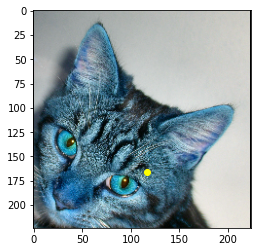

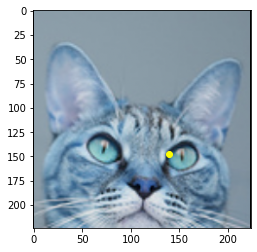

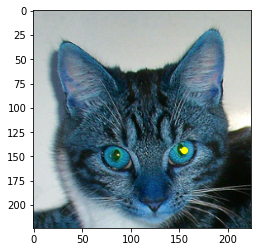

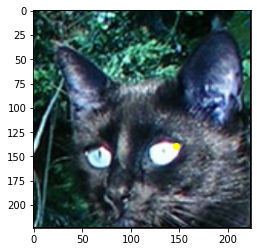

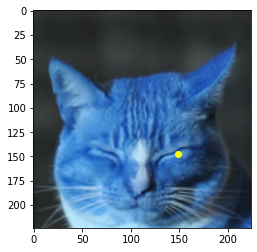

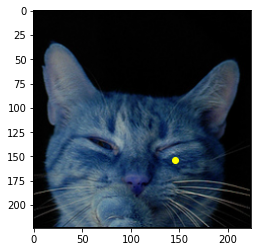

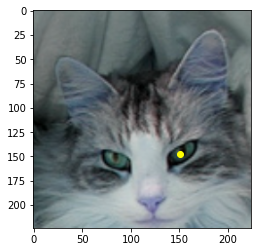

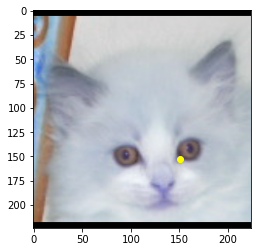

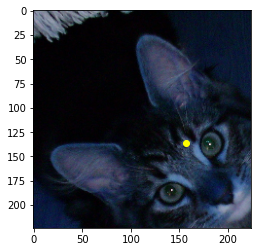

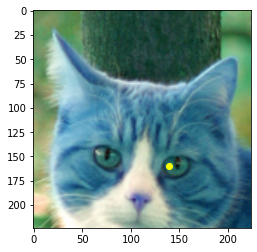

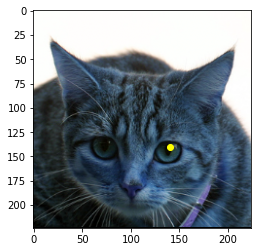

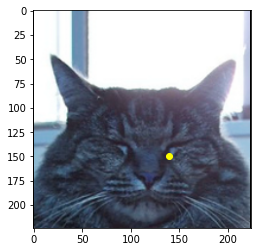

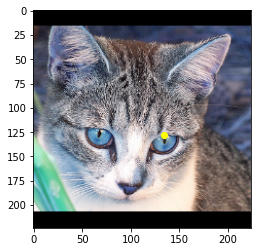

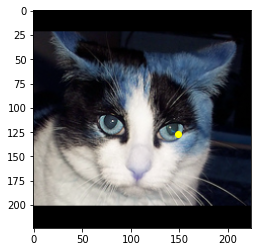

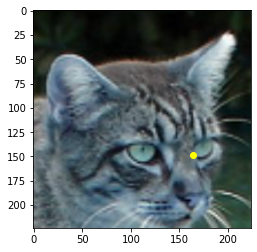

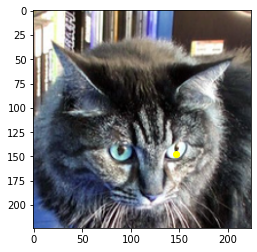

In [ ]:
for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(int(predicted[i][0]*255), int(predicted[i][1]*255), color='yellow')
  plt.show()

# 양쪽 눈 위치 예측하기

## 데이터 준비

In [ ]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
raw_x = np.array(dic_data.get('imgs'))
raw_y = np.array(dic_data.get('lmks'))

## 양쪽 눈 추리기

In [ ]:
x = raw_x
y = raw_y[:,0:4]

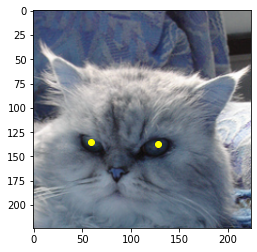

In [ ]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.scatter(target_y[2], target_y[3], color='yellow')
plt.show()

## Normalization

In [ ]:
x = x / 255.

In [ ]:
y = y / 255.

## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(240, 224, 224, 3)
(240, 4)
(60, 224, 224, 3)
(60, 4)


In [ ]:
# 제대로 y값이 있는지 눈으로 확인해 보기위헤 프린트 해보기
print(train_y[:10])

[[0.61568627 0.49411765]
 [0.55294118 0.64705882]
 [0.58431373 0.62745098]
 [0.39607843 0.70588235]
 [0.63137255 0.58431373]
 [0.57647059 0.58823529]
 [0.61176471 0.58039216]
 [0.58039216 0.49411765]
 [0.56078431 0.4745098 ]
 [0.58039216 0.49019608]]


## Template

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               8028288   
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 4)                 516       
                                                                 
Total params: 10,287,300
Trainable params: 8,029,060
N

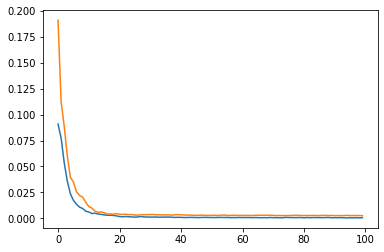

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

eye_model = models.Sequential()

eye_model.add(conv_layers)
eye_model.add(Flatten())
eye_model.add(Dense(128, activation='relu'))
eye_model.add(BatchNormalization())
eye_model.add(Dense(4, activation="sigmoid"))    # <------------------

eye_model.summary()

eye_model.compile(optimizer='Adam', loss='mse')


history = eye_model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


## 결과 보기

In [ ]:
predicted = eye_model.predict(test_x[:16])

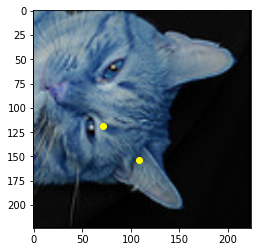

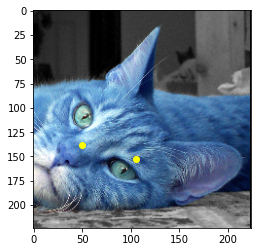

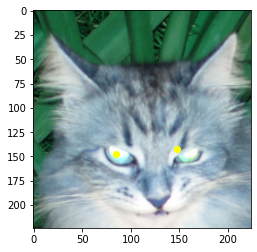

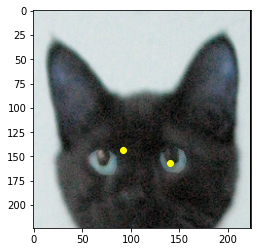

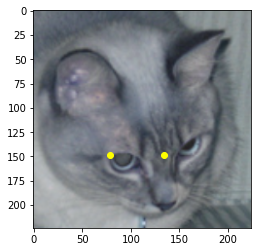

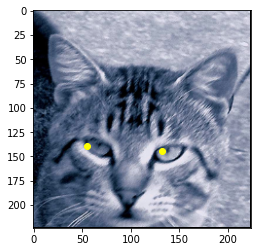

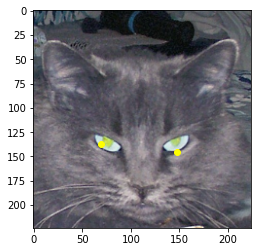

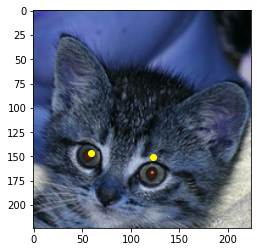

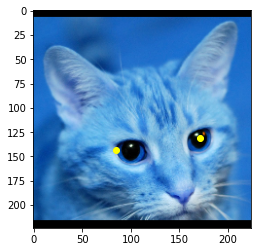

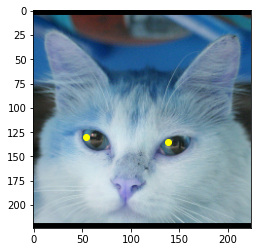

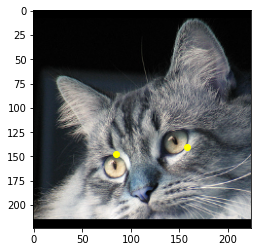

In [ ]:
for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(int(predicted[i][0]*255), int(predicted[i][1]*255), color='yellow')
  plt.scatter(int(predicted[i][2]*255), int(predicted[i][3]*255), color='yellow')
  plt.show()